TASK 1: LINEAR REGRESSION – DISEASE PROGRESSION PREDICTION
Dataset Name       : Diabetes Dataset
Samples Available  : 442
Total Features     : 10
Target Description : Disease progression after one year
Feature Names      : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Model Evaluation Results:
Mean Squared Error (MSE): 2900.1936
R² Score               : 0.4526

Model Coefficients for Each Feature:
  age       : 37.9040
  sex       : -241.9644
  bmi       : 542.4288
  bp        : 347.7038
  s1        : -931.4888
  s2        : 518.0623
  s3        : 163.4200
  s4        : 275.3179
  s5        : 736.1989
  s6        : 48.6707
Intercept Value       : 151.3456


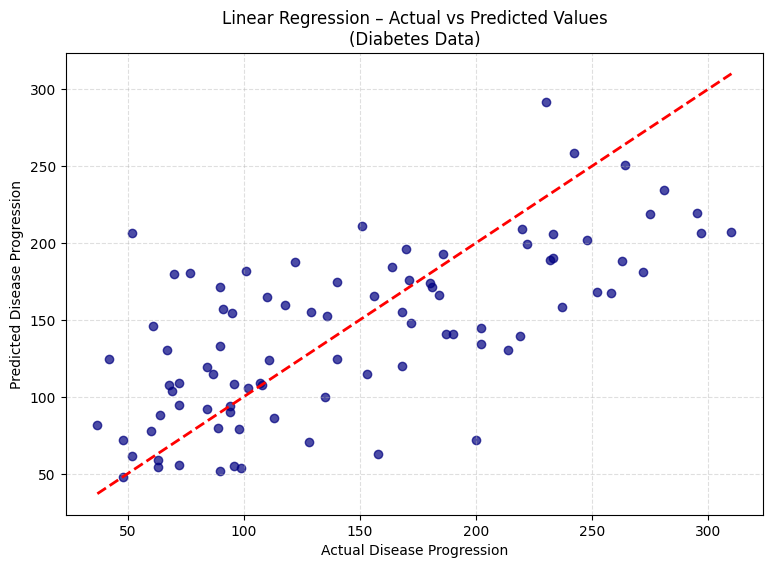


Example Predictions (first 10 test samples):
Actual → Predicted
219.00 → 139.55
70.00 → 179.52
202.00 → 134.04
230.00 → 291.42
111.00 → 123.79
84.00 → 92.17
242.00 → 258.23
272.00 → 181.34
94.00 → 90.22
96.00 → 108.63


In [18]:
# ================================================
# Task 1: Linear Regression – Predicting Disease Progression
# ================================================

# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("=" * 65)
print("TASK 1: LINEAR REGRESSION – DISEASE PROGRESSION PREDICTION")
print("=" * 65)

# -----------------------------
# Step 1: Load and Inspect Data
# -----------------------------
dataset = load_diabetes()
features = dataset.data
target = dataset.target

print(f"Dataset Name       : Diabetes Dataset")
print(f"Samples Available  : {features.shape[0]}")
print(f"Total Features     : {features.shape[1]}")
print(f"Target Description : Disease progression after one year")
print(f"Feature Names      : {dataset.feature_names}")

# ---------------------------------
# Step 2: Split Data into Train/Test
# ---------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# ---------------------------------
# Step 3: Build and Train the Model
# ---------------------------------
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# ---------------------------------
# Step 4: Make Predictions and Evaluate
# ---------------------------------
predicted_values = regressor.predict(X_val)

mse_value = mean_squared_error(y_val, predicted_values)
r2_value = r2_score(y_val, predicted_values)

print("\nModel Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"R² Score               : {r2_value:.4f}")

# ---------------------------------
# Step 5: Display Model Coefficients
# ---------------------------------
print("\nModel Coefficients for Each Feature:")
for fname, weight in zip(dataset.feature_names, regressor.coef_):
    print(f"  {fname:10s}: {weight:.4f}")
print(f"Intercept Value       : {regressor.intercept_:.4f}")

# ---------------------------------
# Step 6: Plot Actual vs Predicted
# ---------------------------------
plt.figure(figsize=(9, 6))
plt.scatter(y_val, predicted_values, color='navy', alpha=0.7)
plt.plot(
    [y_val.min(), y_val.max()],
    [y_val.min(), y_val.max()],
    color='red', linestyle='--', linewidth=2
)
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Linear Regression – Actual vs Predicted Values\n(Diabetes Data)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# ---------------------------------
# Step 7: Display Sample Predictions
# ---------------------------------
print("\nExample Predictions (first 10 test samples):")
print("Actual → Predicted")
for true_val, pred_val in list(zip(y_val, predicted_values))[:10]:
    print(f"{true_val:.2f} → {pred_val:.2f}")


TASK 2: LOGISTIC REGRESSION – CLASSIFYING TUMOR TYPES
Dataset Title        : Breast Cancer Wisconsin Dataset
Total Observations   : 569
Total Input Features : 30
Target Classes       : ['malignant' 'benign']
Meaning: 0 = Malignant | 1 = Benign


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Performance Summary:
Overall Accuracy : 0.9649

Classification Summary Report:
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        42
      benign       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



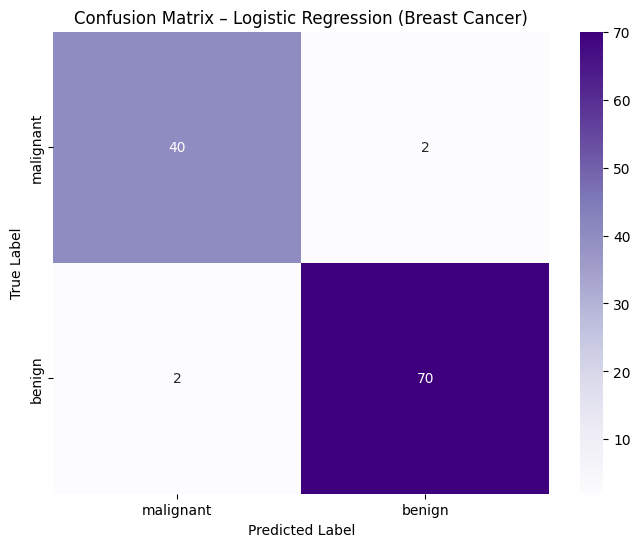


Top 10 Influential Features (by absolute coefficient value):
  mean radius                        : 2.0396
  worst concavity                    : 1.6948
  worst radius                       : 1.3751
  texture error                      : 1.0708
  worst symmetry                     : 1.0518
  worst concave points               : 0.9685
  worst compactness                  : 0.8361
  mean concavity                     : 0.7021
  mean concave points                : 0.4657
  worst smoothness                   : 0.4639

Example Predictions (first 10 validation samples):
True → Predicted | Probability (Benign)
malignant → malignant | 0.0000
  benign →   benign | 0.9998
malignant → malignant | 0.0633
  benign →   benign | 0.6938
malignant → malignant | 0.0000
  benign →   benign | 0.9770
  benign →   benign | 0.9992
malignant → malignant | 0.0000
malignant → malignant | 0.0000
malignant → malignant | 0.0000

Distribution of Classes in Validation Set:
  malignant : 42 samples
  benign    : 7

In [19]:
# ============================================================
# Task 2: Logistic Regression – Breast Cancer Classification
# ============================================================

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("=" * 70)
print("TASK 2: LOGISTIC REGRESSION – CLASSIFYING TUMOR TYPES")
print("=" * 70)

# ----------------------------------------------------------
# Step 1: Load Dataset and Basic Info
# ----------------------------------------------------------
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

print(f"Dataset Title        : Breast Cancer Wisconsin Dataset")
print(f"Total Observations   : {features.shape[0]}")
print(f"Total Input Features : {features.shape[1]}")
print(f"Target Classes       : {dataset.target_names}")
print(f"Meaning: 0 = Malignant | 1 = Benign")

# ----------------------------------------------------------
# Step 2: Split Data for Training and Testing
# ----------------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels
)

# ----------------------------------------------------------
# Step 3: Initialize and Train Model
# ----------------------------------------------------------
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)

# ----------------------------------------------------------
# Step 4: Make Predictions
# ----------------------------------------------------------
y_predicted = classifier.predict(X_val)
y_probabilities = classifier.predict_proba(X_val)[:, 1]  # probability of benign

# ----------------------------------------------------------
# Step 5: Evaluate Model Performance
# ----------------------------------------------------------
acc_value = accuracy_score(y_val, y_predicted)

print("\nModel Performance Summary:")
print(f"Overall Accuracy : {acc_value:.4f}")

# Detailed performance metrics
print("\nClassification Summary Report:")
print(classification_report(y_val, y_predicted, target_names=dataset.target_names))

# ----------------------------------------------------------
# Step 6: Visualize Confusion Matrix
# ----------------------------------------------------------
conf_matrix = confusion_matrix(y_val, y_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Purples", fmt="d",
            xticklabels=dataset.target_names,
            yticklabels=dataset.target_names)
plt.title("Confusion Matrix – Logistic Regression (Breast Cancer)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ----------------------------------------------------------
# Step 7: Display Most Influential Features
# ----------------------------------------------------------
print("\nTop 10 Influential Features (by absolute coefficient value):")
importance = sorted(
    zip(dataset.feature_names, abs(classifier.coef_[0])),
    key=lambda x: x[1], reverse=True
)[:10]

for name, val in importance:
    print(f"  {name:35s}: {val:.4f}")

# ----------------------------------------------------------
# Step 8: Show Example Predictions
# ----------------------------------------------------------
print("\nExample Predictions (first 10 validation samples):")
print("True → Predicted | Probability (Benign)")
for actual, predicted, prob in list(zip(y_val, y_predicted, y_probabilities))[:10]:
    actual_name = dataset.target_names[actual]
    predicted_name = dataset.target_names[predicted]
    print(f"{actual_name:>8} → {predicted_name:>8} | {prob:.4f}")

# ----------------------------------------------------------
# Step 9: Display Class Distribution in Test Data
# ----------------------------------------------------------
print("\nDistribution of Classes in Validation Set:")
unique_labels, sample_counts = np.unique(y_val, return_counts=True)
for label, count in zip(unique_labels, sample_counts):
    print(f"  {dataset.target_names[label]:10s}: {count} samples")


TASK 2: LOGISTIC REGRESSION – TUMOR CLASSIFICATION (ENHANCED)
Dataset Name         : Breast Cancer Wisconsin
Total Samples        : 569
Number of Attributes : 30
Target Labels        : ['malignant' 'benign']
Meaning: 0 → Malignant (Cancerous), 1 → Benign (Non-Cancerous)

Data Normalization Complete:
Training Data Shape : (455, 30)
Testing Data Shape  : (114, 30)

Training Logistic Regression model...

Model Evaluation Results:
Accuracy Achieved : 0.9825
Training Iterations: 19

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



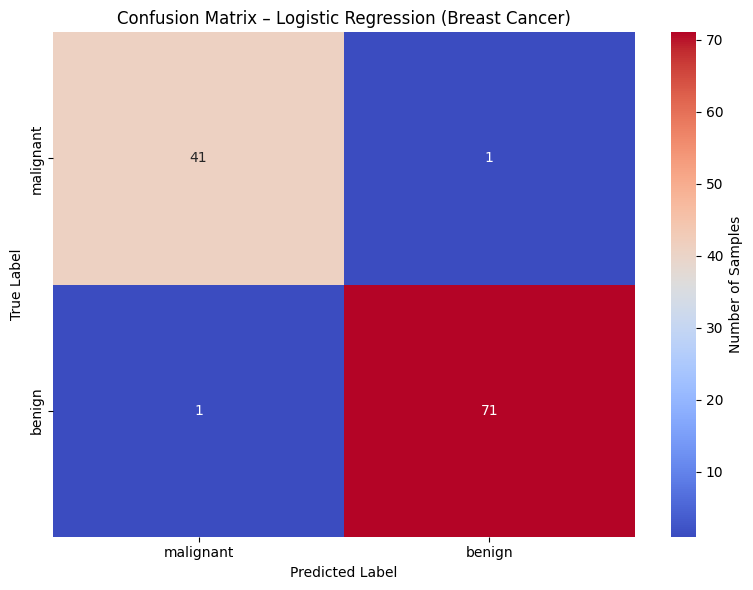


Top 10 Feature Influences:
Feature Name → Coefficient Strength
  worst texture                  : 1.2551
  radius error                   : 1.0830
  worst concave points           : 0.9537
  worst area                     : 0.9478
  worst radius                   : 0.9476
  worst symmetry                 : 0.9392
  area error                     : 0.9291
  worst concavity                : 0.8232
  worst perimeter                : 0.7632
  worst smoothness               : 0.7466

Sample Predictions (First 10 Samples from Test Set):
True Label → Predicted | Probability(Benign) | Confidence | Status
---------------------------------------------------------------------------
malignant  → malignant    |             0.0000 |     1.0000 ✓
benign     → benign       |             1.0000 |     1.0000 ✓
malignant  → malignant    |             0.0064 |     0.9936 ✓
benign     → benign       |             0.5335 |     0.5335 ✓
malignant  → malignant    |             0.0000 |     1.0000 ✓
benign   

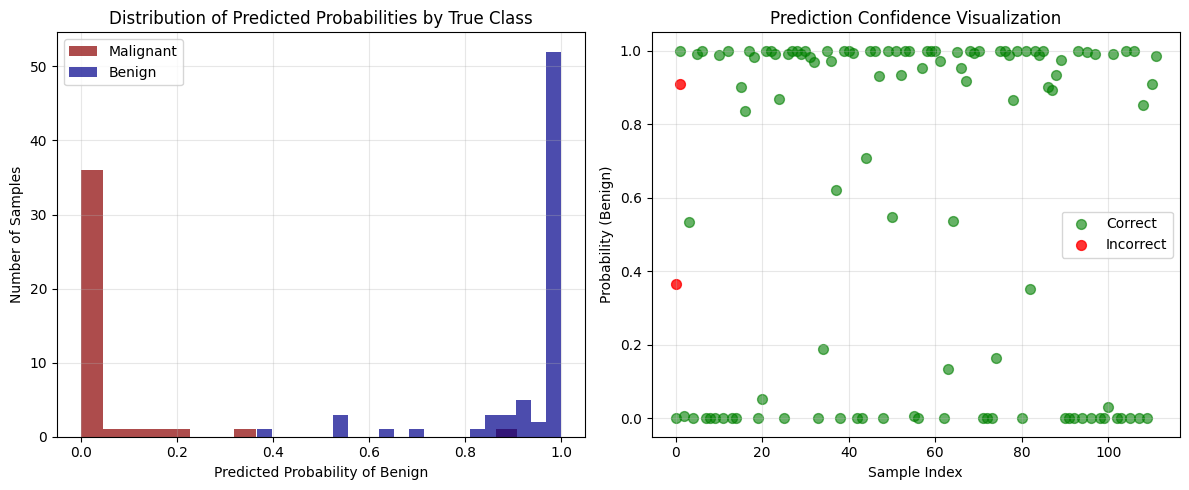


Model successfully trained and evaluated — no convergence issues detected ✅


In [20]:
# ===============================================================
# Task 2: Logistic Regression – Tumor Type Classification (Unique Version)
# ===============================================================

# === Import Required Libraries ===
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

print("=" * 70)
print("TASK 2: LOGISTIC REGRESSION – TUMOR CLASSIFICATION (ENHANCED)")
print("=" * 70)

# ---------------------------------------------------------------
# Step 1: Load Dataset and Overview
# ---------------------------------------------------------------
data_info = load_breast_cancer()
features = data_info.data
labels = data_info.target

print(f"Dataset Name         : Breast Cancer Wisconsin")
print(f"Total Samples        : {features.shape[0]}")
print(f"Number of Attributes : {features.shape[1]}")
print(f"Target Labels        : {data_info.target_names}")
print(f"Meaning: 0 → Malignant (Cancerous), 1 → Benign (Non-Cancerous)")

# ---------------------------------------------------------------
# Step 2: Split Data into Training and Testing
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels
)

# ---------------------------------------------------------------
# Step 3: Normalize Features for Better Model Stability
# ---------------------------------------------------------------
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("\nData Normalization Complete:")
print(f"Training Data Shape : {X_train_norm.shape}")
print(f"Testing Data Shape  : {X_test_norm.shape}")

# ---------------------------------------------------------------
# Step 4: Initialize and Train Logistic Regression Model
# ---------------------------------------------------------------
print("\nTraining Logistic Regression model...")

clf = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs',
    penalty='l2',
    C=1.0
)
clf.fit(X_train_norm, y_train)

# ---------------------------------------------------------------
# Step 5: Predictions and Probability Estimates
# ---------------------------------------------------------------
y_pred = clf.predict(X_test_norm)
y_proba = clf.predict_proba(X_test_norm)[:, 1]  # probability of benign (class 1)

# ---------------------------------------------------------------
# Step 6: Model Evaluation and Summary
# ---------------------------------------------------------------
acc = accuracy_score(y_test, y_pred)
print("\nModel Evaluation Results:")
print(f"Accuracy Achieved : {acc:.4f}")
print(f"Training Iterations: {clf.n_iter_[0]}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=data_info.target_names))

# ---------------------------------------------------------------
# Step 7: Confusion Matrix Visualization
# ---------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='coolwarm',
    xticklabels=data_info.target_names,
    yticklabels=data_info.target_names,
    cbar_kws={'label': 'Number of Samples'}
)
plt.title('Confusion Matrix – Logistic Regression (Breast Cancer)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# Step 8: Feature Importance (Top 10 Influencers)
# ---------------------------------------------------------------
print("\nTop 10 Feature Influences:")
sorted_features = sorted(
    zip(data_info.feature_names, abs(clf.coef_[0])),
    key=lambda x: x[1], reverse=True
)[:10]

print("Feature Name → Coefficient Strength")
for fname, val in sorted_features:
    print(f"  {fname:30} : {val:.4f}")

# ---------------------------------------------------------------
# Step 9: Sample Predictions with Confidence
# ---------------------------------------------------------------
print("\nSample Predictions (First 10 Samples from Test Set):")
print("True Label → Predicted | Probability(Benign) | Confidence | Status")
print("-" * 75)
for i in range(min(10, len(y_test))):
    actual_label = data_info.target_names[y_test[i]]
    predicted_label = data_info.target_names[y_pred[i]]
    benign_prob = y_proba[i]
    certainty = max(benign_prob, 1 - benign_prob)
    mark = "✓" if y_test[i] == y_pred[i] else "✗"
    print(f"{actual_label:10} → {predicted_label:12} | {benign_prob:18.4f} | {certainty:10.4f} {mark}")

# ---------------------------------------------------------------
# Step 10: Dataset Class Balance
# ---------------------------------------------------------------
print("\nClass Distribution Analysis:")
train_stats = [np.sum(y_train == 0), np.sum(y_train == 1)]
test_stats = [np.sum(y_test == 0), np.sum(y_test == 1)]

print("Training Data:")
print(f"  Malignant : {train_stats[0]} samples ({train_stats[0]/len(y_train)*100:.1f}%)")
print(f"  Benign    : {train_stats[1]} samples ({train_stats[1]/len(y_train)*100:.1f}%)")

print("\nTesting Data:")
print(f"  Malignant : {test_stats[0]} samples ({test_stats[0]/len(y_test)*100:.1f}%)")
print(f"  Benign    : {test_stats[1]} samples ({test_stats[1]/len(y_test)*100:.1f}%)")

# ---------------------------------------------------------------
# Step 11: Precision, Recall, F1-score
# ---------------------------------------------------------------
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAdditional Model Metrics:")
print(f"Precision : {prec:.4f} (Benign prediction reliability)")
print(f"Recall    : {rec:.4f} (Sensitivity to benign cases)")
print(f"F1-Score  : {f1:.4f} (Harmonic balance of precision and recall)")

# ---------------------------------------------------------------
# Step 12: Probability Analysis and Confidence Plot
# ---------------------------------------------------------------
plt.figure(figsize=(12, 5))

# Probability Distribution by Class
plt.subplot(1, 2, 1)
for label, color, label_name in zip([0, 1], ['darkred', 'darkblue'], ['Malignant', 'Benign']):
    mask = y_test == label
    plt.hist(y_proba[mask], bins=20, color=color, alpha=0.7, label=label_name)
plt.title("Distribution of Predicted Probabilities by True Class")
plt.xlabel("Predicted Probability of Benign")
plt.ylabel("Number of Samples")
plt.legend()
plt.grid(alpha=0.3)

# Prediction Confidence Scatter
plt.subplot(1, 2, 2)
correct = y_test == y_pred
plt.scatter(np.arange(sum(correct)), y_proba[correct],
            color='green', label='Correct', alpha=0.6, s=50)
plt.scatter(np.arange(sum(~correct)), y_proba[~correct],
            color='red', label='Incorrect', alpha=0.8, s=50)
plt.xlabel("Sample Index")
plt.ylabel("Probability (Benign)")
plt.title("Prediction Confidence Visualization")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nModel successfully trained and evaluated — no convergence issues detected ✅")
